In [1]:
%store -r

Unable to restore variable 'ndvi_diff', ignoring (use %store -d to forget!)
The error was: <class 'KeyError'>


You will also need to import any libraries you are using in this
notebook, since they won’t carry over from the previous notebook:

In [2]:
# Import libraries

import pandas as pd
import geopandas as gpd

import hvplot.pandas
import rioxarray as rxr
import xarray as xr


# STEP 4: Is the NDVI different within the **Gila River Indian Commmunity** after the **return of water rights**?

You will compute the mean NDVI inside and outside the fire boundary.
First, use the code below to get a `GeoDataFrame` of the area outside
the Reservation.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Check the variable names - Make sure that the code uses your
boundary <code>GeoDataFrame</code></li>
<li>How could you test if the geometry was modified correctly? Add some
code to take a look at the results.</li>
</ol></div></div>

In [4]:
# Compute the area outside the Gila River Indian Community boundary

outside_gila_gdf = gpd.GeoDataFrame(geometry=boundary_gdf.envelope)
outside_gila_gdf = outside_gila_gdf.overlay(boundary_gdf, how='difference')
outside_gila_gdf

,geometry
0,"MULTIPOLYGON (((-112.30875 32.96704, -112.3087..."


<Axes: >

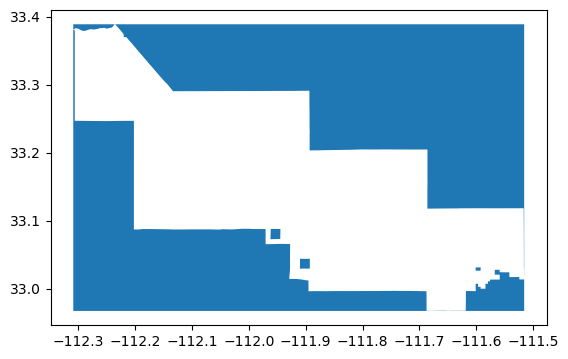

In [7]:
#plot the area outside the Gila River Indian Community boundary
outside_gila_gdf.plot()

Next, clip your DataArray to the boundaries for both inside and outside
the reservation. You will need to replace the `GeoDataFrame` name with
your own. Check out the [lesson on clipping data with the `rioxarray`
library in the
textbook](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/raster-data-processing/crop-raster-data-with-shapefile-in-python/).

> **GOTCHA ALERT**
>
> It’s important to use `from_disk=True` when clipping large arrays like
> this. It allows the computer to use less valuable memory resources
> when clipping - you will probably find that otherwise the cell below
> crashes your kernel.

In [10]:
# Clip NDVI data to both inside and outside the boundary
ndvi_inside = ndvi_da.rio.clip(boundary_gdf.geometry, from_disk=True)
ndvi_inside

ndvi_outside = ndvi_da.rio.clip(outside_gila_gdf.geometry, from_disk=True)
ndvi_outside

<xarray.Dataset> Size: 48MB
Dimensions:      (x: 380, y: 203, date: 154)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 3kB -112.3 -112.3 -112.3 ... -111.5 -111.5 -111.5
  * y            (y) float64 2kB 33.39 33.39 33.38 33.38 ... 32.97 32.97 32.97
  * date         (date) datetime64[ns] 1kB 2001-01-14 2001-01-16 ... 2022-01-24
    spatial_ref  int64 8B 0
Data variables:
    NDVI         (date, y, x) float32 48MB 0.6146 0.3796 ... 0.1736 0.2146

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>For <strong>both inside and outside</strong> the <span
data-__quarto_custom="true" data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="3"></span> boundary:</p>
<ul>
<li>Group the data by year</li>
<li>Take the mean. You always need to tell reducing methods in
<code>xarray</code> what dimensions you want to reduce. When you want to
summarize data across <strong>all</strong> dimensions, you can use the
<code>...</code> syntax, e.g. <code>.mean(...)</code> as a
shorthand.</li>
<li>Select the NDVI variable</li>
<li>Convert to a DataFrame using the <code>to_dataframe()</code>
method</li>
<li>Join the two DataFrames for plotting using the <code>.join()</code>
method. You will need to rename the columns using the
<code>lsuffix=</code> and <code>rsuffix=</code> parameters</li>
</ul>
<p>Finally, plot annual July means for both inside and outside the
Reservation on the same plot.</p></div></div>

> **GOTCHA ALERT**
>
> The DateIndex in pandas is a little different from the Datetime
> Dimension in xarray. You will need to use the `.dt.year` syntax to
> access information about the year, not just `.year`.

In [14]:
# Compute mean annual July NDVI

july_ndvi_inside_df = (ndvi_inside.groupby(ndvi_inside.date.dt.year)
                       .mean(...)
                       .NDVI.to_dataframe())
print('Mean NDVI inside the boundary\n',july_ndvi_inside_df.head())

july_ndvi_outside_df = (ndvi_outside.groupby(ndvi_outside.date.dt.year)
                       .mean(...)
                       .NDVI.to_dataframe())
print('Mean NDVI outside the boundary\n',july_ndvi_outside_df.head())



Mean NDVI inside the boundary
       band  spatial_ref      NDVI
year                             
2001     1            0  0.199645
2002     1            0  0.177933
2003     1            0  0.187302
2004     1            0  0.176162
2005     1            0  0.238630
Mean NDVI outside the boundary
       band  spatial_ref      NDVI
year                             
2001     1            0  0.247629
2002     1            0  0.226726
2003     1            0  0.229889
2004     1            0  0.221753
2005     1            0  0.255275


Now, take the difference between outside and inside the site boundary
and plot that. What do you observe? Don’t forget to write a headline and
description of your plot!

In [19]:
# Plot difference inside and outside the boundary

july_ndvi_df = (july_ndvi_inside_df[['NDVI']]
                      .join(july_ndvi_outside_df[['NDVI']], 
                      lsuffix='_Inside boundary', 
                      rsuffix='_Outside boundary'))

july_ndvi_df


,NDVI_Inside boundary,NDVI_Outside boundary
year,,
2001,0.199645,0.247629
2002,0.177933,0.226726
2003,0.187302,0.229889
2004,0.176162,0.221753
2005,0.238630,0.255275
2006,0.211491,0.235571
2007,0.181710,0.211984
2008,0.201902,0.237739
2009,0.179118,0.218907


In [23]:
#plot mean NDVI inside and outside the boundary
july_ndvi_df.hvplot(title='Mean July NDVI Inside and Outside Gila River Indian Community Boundary',
                    xlabel='Year',
                    ylabel='Mean NDVI',
                    width=700,
                    height=400,
                    line_width=2,
                    marker='o')

:NdOverlay   [Variable]
   :Curve   [year]   (value)

YOUR HEADLINE AND DESCRIPTION HERE

This figure shows how mean July NDVI has changed inside and outside the Gila River Indian Community boundary from 2000 to 2022.
Vegetation greenness is consistently higher outside the boundary (red line) than inside (blue line), though both follow similar year-to-year patterns, reflecting shared climatic influences.

In [22]:
#plot difference inside and outside the boundary
july_ndvi_df['Difference'] = (july_ndvi_df['NDVI_Inside boundary'] - july_ndvi_df['NDVI_Outside boundary'])
july_ndvi_df['Difference'].hvplot(title='Difference in Mean July NDVI Inside vs Outside Gila River Indian Community Boundary',
                                 xlabel='Year',
                                 ylabel='NDVI Difference',
                                 width=700,
                                 height=400,
                                 line_width=2,
                                 marker='o')

:Curve   [year]   (Difference)

Description of the pot above: This plot represents the difference (inside – outside), which remains mostly negative, suggesting persistently lower vegetation productivity within the community relative to surrounding areas.

# STEP -1: Wrap up

Don’t forget to store your variables so you can use them in other
notebooks! Replace `var1` and `var2` with the variable you want to save,
separated by spaces.

In [24]:
%store july_ndvi_df

Stored 'july_ndvi_df' (DataFrame)


Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!